In [1]:
import matplotlib.pyplot as plt
import numpy as np
from read_dat import *
from time import time

# file = read_dat("../Data/AmBe.dat", align_method='max', t_short=[20])
file = read_dat("../Data/AmBe.dat", align_method='CFD', align_args=[0.75, 6], t_short=[20], calibration_m=0.00010230476254145869, calibration_c=0.012454430536400718)
# file = read_dat("../Data/AmBe.dat", align_method='CFD', align_args=[0.75, 6, 6])

init complete


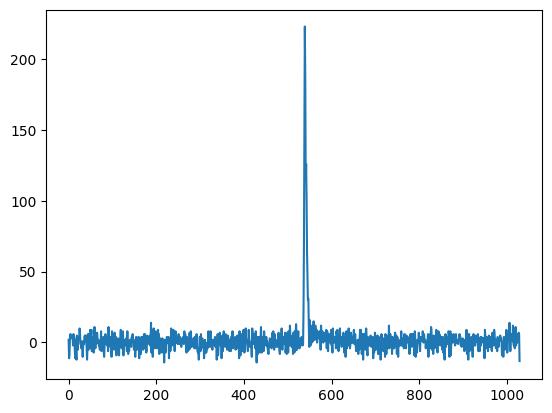

In [2]:
ev = file.read_event(align_method_read='max')

trace = ev[0].get_trace()

plt.plot(trace)


In [3]:
def cfd(F, L, O, trace):
    # F = self.CFD[0]
    # L = self.CFD[1]
    # O = self.CFD[2]
    cfdArr = np.zeros(len(trace))
    zero_cross = 0
    #calculate CFD 
    for i in range(O + L + 1, len(trace) - O - L - 1, 1):
        cfdArr[i] = np.sum(F * trace[i - L : i - 1] - trace[i - L - O : i - 1 - O])
    #find the inflection point
    closest = np.argmin(np.subtract(cfdArr, np.roll(cfdArr, 1)))
    lower = 0
    upper = 0
    #Locate the zero crossing near to the inflection point
    if cfdArr[closest] < 0:
        while cfdArr[closest] < 0:
            closest -= 1
        lower = closest
        upper = closest + 1
    else:
        while cfdArr[closest] > 0:
            closest += 1
        upper = closest
        lower = closest - 1


    #calculate the crossover time through a weighted average of the two nearest samples to the zero 
    sum_y = np.sum(np.abs(cfdArr[lower:upper + 1]))
    zero_cross = lower * (1 - np.abs(cfdArr[lower]) / sum_y) + (upper) * (1 - np.abs(cfdArr[upper]) / sum_y)

    return cfdArr, zero_cross


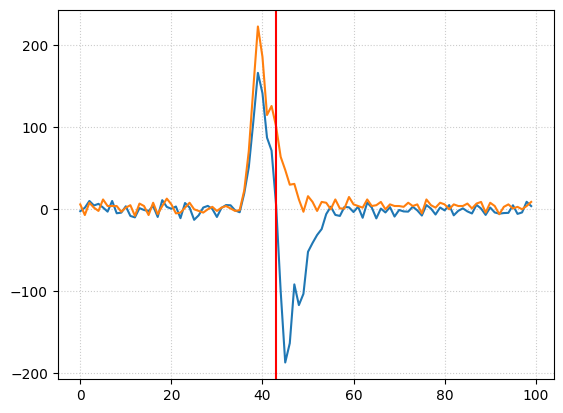

In [7]:
frac = 0.75
offset = 6

frac_trace = trace * frac
delay_trace = np.roll(trace, offset)

cfd_array = frac_trace - delay_trace

cfd_array_max_index = np.where(cfd_array == np.max(cfd_array))[0][0]
cfd_array_min_index = np.where(cfd_array == np.min(cfd_array))[0][0]

cfd_between_extrema = cfd_array[cfd_array_max_index:cfd_array_min_index]

zero_cross_index = cfd_array_max_index + np.where( np.diff( np.sign( cfd_array[cfd_array_max_index:cfd_array_min_index] ) ) != 0 )[0][0]


plt.plot(cfd_array[500:600])
# plt.plot(cfd_between_extrema)
plt.plot(trace[500:600])
plt.axvline(zero_cross_index - 500, color='red')
# plt.plot(np.diff(cfd_array[cfd_array_max_index:cfd_array_min_index]))
# plt.plot(np.diff(np.sign(cfd_array))[530:580])
# plt.ylim(-4, 4)
plt.grid(color='#CCCCCC', linestyle=':')

In [ ]:
F = 0.75
L = 6
O = 6

cfd_array = np.zeros(len(trace))
zero_cross = 0

for i in range(O + L + 1, len(trace) - O - L - 1):
    for j in range(1, L):
        cfd_array[i] += F * trace[i - j]


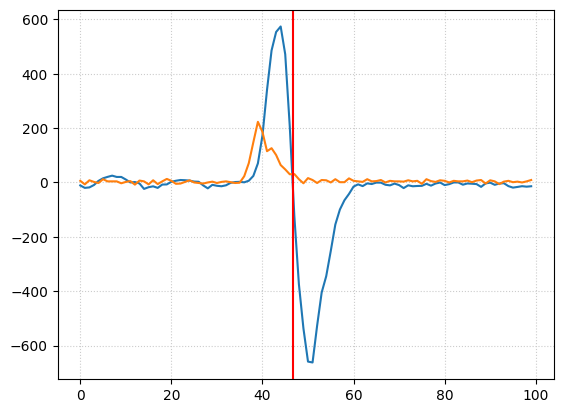

In [9]:
cfd_stuff = cfd(0.75, 6, 6, trace)
plt.plot(cfd_stuff[0][500:600])
plt.plot(trace[500:600])
plt.axvline(cfd_stuff[1]-500, color='red')
plt.grid(color='#CCCCCC', linestyle=':')

[503.] [553.] [743.]


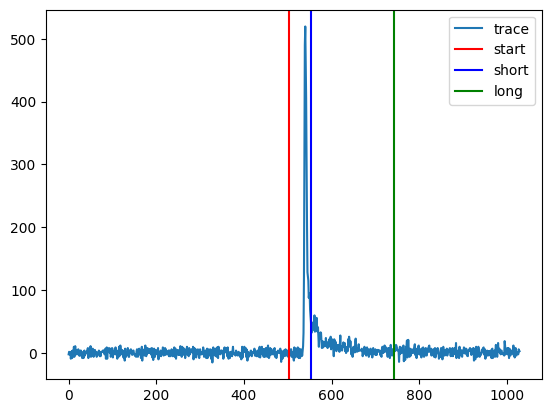

In [4]:
ev = file.read_event(align_method_read='fast_CFD', align_args_read=[0.75, 6])

istart, ishort, ilong, align = ev[0].get_times()
print(istart, ishort, ilong)

plt.plot(ev[0].get_trace(), label='trace')
# plt.axvline(ev[0].get_t0(), label='t0')
plt.axvline(istart, label='start', color='red')
plt.axvline(ishort, label='short', color='blue')
plt.axvline(ilong, label='long', color='green')
# plt.axvline(align, label='align', color='orange')
plt.legend()

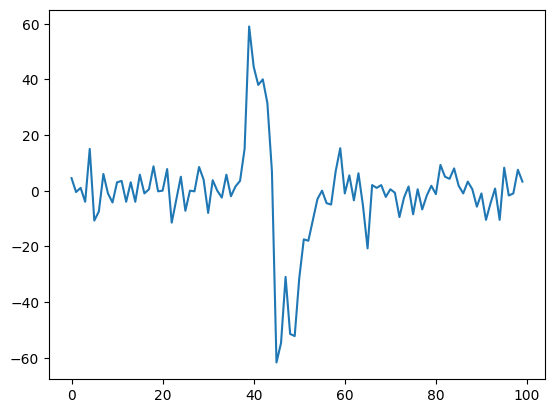

In [7]:
f = open('HELP.txt', 'r')
cfd_arr = np.loadtxt('cfd_arr')
trace = np.loadtxt('trace')

plt.plot(cfd_arr[500:600])
# plt.plot(trace)

In [2]:
t1 = time()
file.lst_out(10000, [0], [[1,1,0,0,0]], False, filename='fast_CFD_test.csv')
t2 = time()

print(f'Time taken: {t2-t1}')

1000 events
2000 events
3000 events
4000 events
5000 events
6000 events
7000 events
7000 events
8000 events
9000 events
10000 events
End reading
Time taken: 3.6850130558013916


In [6]:
t1 = time()
file.lst_out(10000, [0], True, False, filename='CFD_test.csv', align_method_lst='max')
t2 = time()

print(f'Time taken: {t2-t1}')

1000 events
2000 events
3000 events
4000 events
5000 events
6000 events
7000 events
8000 events
9000 events
10000 events
End reading
Time taken: 5.683096885681152


In [3]:
file.get_fails(True)

Channel: 0	Events: 11325	Fails: 1325.0
tstart: 9.0	tlong: 29.0	tshort: 1.0	integral: 1287.0	t0: 7.0


(array([[9.000e+00, 2.900e+01, 1.000e+00, 1.287e+03, 7.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([1325.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 11325)

In [3]:
import csv

L_CFD = []
S_CFD = []

CFD_file = open('fast_CFD_test.csv', 'r')

CFD_reader = csv.reader(CFD_file)

head = next(CFD_reader)
head = next(CFD_reader)

for row in CFD_reader:
    L_CFD.append(float(row[0]))
    S_CFD.append(float(row[1]))

CFD_file.close()

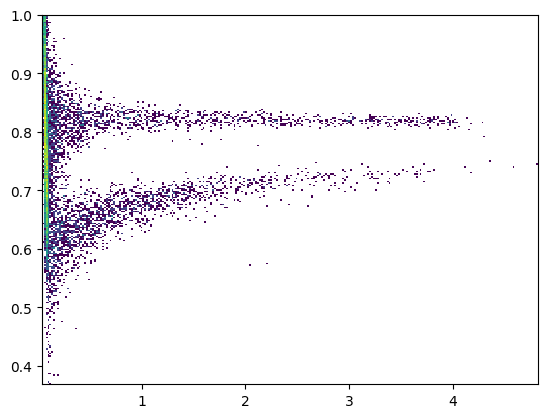

In [4]:
plt.hist2d(L_CFD, S_CFD, [256,256], norm=colors.LogNorm(vmin=1))
plt.show()

In [16]:

L_no_CFD = []
S_no_CFD = []

no_file = open('CFD_test.csv', 'r')

no_reader = csv.reader(no_file)

for row in no_reader:
    L_no_CFD.append(float(row[0]))
    S_no_CFD.append(float(row[1]))


(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  5.,  5.,  8.],
        [ 0.,  0.,  0., ..., 20., 34., 22.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([    0.    ,   195.3125,   390.625 ,   585.9375,   781.25  ,
          976.5625,  1171.875 ,  1367.1875,  1562.5   ,  1757.8125,
         1953.125 ,  2148.4375,  2343.75  ,  2539.0625,  2734.375 ,
         2929.6875,  3125.    ,  3320.3125,  3515.625 ,  3710.9375,
         3906.25  ,  4101.5625,  4296.875 ,  4492.1875,  4687.5   ,
         4882.8125,  5078.125 ,  5273.4375,  5468.75  ,  5664.0625,
         5859.375 ,  6054.6875,  6250.    ,  6445.3125,  6640.625 ,
         6835.9375,  7031.25  ,  7226.5625,  7421.875 ,  7617.1875,
         7812.5   ,  8007.8125,  8203.125 ,  8398.4375,  8593.75  ,
         8789.0625,  8984.375 ,  9179.6875,  9375.    ,  9570.3125,
         9765.625 ,  9960.9375, 101

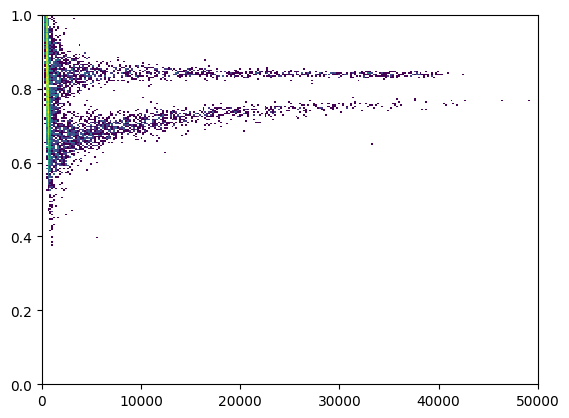

In [20]:
plt.hist2d(L_no_CFD, S_no_CFD, [256,256], norm=colors.LogNorm(vmin=1), range=((0, 50000), (0, 1)))

In [18]:
file.lst_out(10000, [0], [1,1,0,0,0], False, filename='test_out.csv', range=((0, 50000), (0, 1))

SyntaxError: unexpected EOF while parsing (952017126.py, line 1)

In [4]:
labels = np.array(['L [ch]', 'S[ch]', 'T (trigger) [us]', 'baseline', 'pulse height [bits]'])

out = np.array([1,1,0,0,0])

print(labels[out == 1])

['L [ch]' 'S[ch]']
